In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

f = open("./testdata/01_14T_01.dat")
ls = f.readlines()[2:-1]
sl = [ll.split() for ll in ls]
fl = [list(map(float, ll)) for ll in sl]
df = pd.DataFrame(fl)
df.columns = ['current', 'voltage']

In [7]:
newdf = df[~df.duplicated(subset='current')]
newdf = newdf.sort_values('current')

[[-0.015, 6.347],
 [-0.015, 6.338],
 [-0.015, 6.351],
 [-0.015, 6.353],
 [-0.015, 6.348],
 [-0.015, 6.34],
 [-0.015, 6.35],
 [-0.015, 6.358],
 [-0.016, 6.35],
 [-0.015, 6.336],
 [-0.015, 6.346],
 [-0.016, 6.339],
 [-0.016, 6.344],
 [-0.016, 6.342],
 [-0.016, 6.35],
 [-0.016, 6.351],
 [-0.015, 6.38],
 [-0.016, 6.343],
 [-0.015, 6.349],
 [-0.015, 6.349],
 [-0.016, 6.331],
 [-0.015, 6.353],
 [-0.016, 6.376],
 [-0.016, 6.328],
 [-0.016, 6.345],
 [-0.015, 6.348],
 [-0.015, 6.349],
 [-0.015, 6.356],
 [-0.016, 6.37],
 [-0.016, 6.355],
 [-0.016, 6.345],
 [-0.016, 6.373],
 [-0.015, 6.354],
 [-0.016, 6.376],
 [-0.015, 6.346],
 [-0.015, 6.353],
 [-0.015, 6.369],
 [-0.015, 6.349],
 [-0.015, 6.349],
 [-0.016, 6.354],
 [-0.016, 6.37],
 [-0.016, 6.359],
 [-0.016, 6.366],
 [-0.016, 6.371],
 [-0.015, 6.345],
 [-0.016, 6.378],
 [-0.016, 6.322],
 [-0.016, 6.359],
 [-0.016, 6.369],
 [-0.015, 6.326],
 [-0.016, 6.351],
 [-0.016, 6.347],
 [-0.016, 6.346],
 [-0.015, 6.342],
 [-0.016, 6.331],
 [-0.016, 6.335],

In [9]:
from scipy.interpolate import InterpolatedUnivariateSpline

In [41]:
f = InterpolatedUnivaariateSpline(newdf['current'], newdf['voltage'], k=5)

In [49]:
xx = np.linspace(0, newdf['current'].max(), 1000)
yy = f(xx)

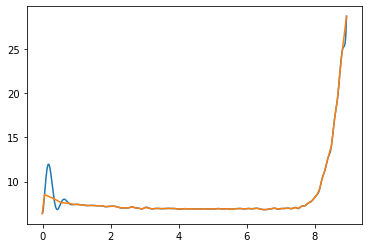

In [50]:
plt.plot(xx, yy)
plt.plot(newdf['current'], newdf['voltage'])

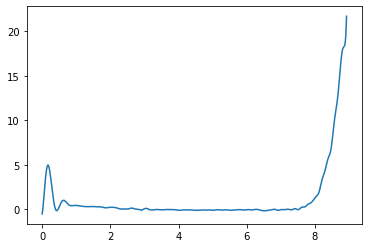

In [82]:
# ベースラインの削除
rangex = np.linspace(0, 10, 10000) # ベースラインのy範囲
size = len(xx)
alldata = dict()
sumdata = 1e10
for i in rangex:
    line = i * np.ones(size)
    after = yy - line
    absafter = np.abs(after)
    sumafter = np.sum(absafter)
    if sumafter < sumdata:
        sumdata   = sumafter
        alldata[sumdata] = i
        
aftery = yy - alldata[sumdata] * np.ones(size)
plt.plot(xx, aftery)

In [87]:
fnew = InterpolatedUnivariateSpline(xx, aftery-1)

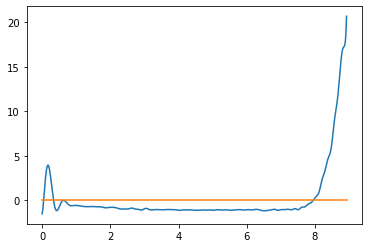

In [92]:
plt.plot(xx, fnew(xx))
plt.plot(xx, np.zeros(size))

In [90]:
fnew.roots()

array([0.04243591, 0.33445678, 0.61071396, 0.64679795, 7.94836916])

array([-0.51396195])